#Preprocess and EDA.
<a id='top_cell'></a>
With the Datasets united into 2 (df_recursos.csv and df_crimen.csv) the  pre-process and EDA of the datasets.

This Notebook was originally on Colab.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [13]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 13.8 MB/s 
     |████████████████████████████████| 16.7 MB 454 kB/s 
     |████████████████████████████████| 6.3 MB 58.1 MB/s 


In [20]:
from operator import itemgetter
import geopandas as gpd
import numpy                 as np
import pandas                as pd
import matplotlib.pyplot     as plt
import seaborn               as sns
import folium  #needed for interactive map
import plotly.express as px
from folium.plugins import HeatMap
from scipy import stats
import plotly.graph_objects as go
from tqdm import tqdm
%matplotlib inline
sns.set()

## Datasets
We need first to upload the dataset that is going to be Preprocess

In [34]:
#df = pd.read_csv('/content/drive/MyDrive/DS4A/dataframes/df_recursos.csv') # In case we are Preprocessing the Resource dataset
df = pd.read_csv('/content/drive/MyDrive/DS4A/dataframes/df_crimenes.csv') # In case we are Preprocessing the Crime dataset
df.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (25,31) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,fecha_hecho,cantidad,latitud,longitud,sexo,edad,estado_civil,grupo_actor,actividad_delictiva,parentesco,...,sede_receptora,bien,categoria_bien,grupo_bien,modelo,color,permiso,unidad_medida,fecha_ingestion,Nbase
0,2003-01-01T10:00:00.000-05:00,1.0,NaN,NaN,Sin dato,-1,Sin dato,Sin dato,Sin dato,Sin dato,...,Sin dato,Sin dato,Sin dato,Sin dato,Sin dato,Sin dato,Sin dato,Sin dato,2022-03-06T04:05:34.000-05:00,Extorsión
1,2003-01-01T11:00:00.000-05:00,1.0,NaN,NaN,Sin dato,-1,Sin dato,Guerrilla,Sin dato,Sin dato,...,Sin dato,Sin dato,Sin dato,Sin dato,Sin dato,Sin dato,Sin dato,Sin dato,2022-03-06T04:05:34.000-05:00,Extorsión
2,2003-01-10T06:00:00.000-05:00,1.0,NaN,NaN,Hombre,-1,Sin dato,Sin dato,Sin dato,Sin dato,...,Sin dato,Sin dato,Sin dato,Sin dato,Sin dato,Sin dato,Sin dato,Sin dato,2022-03-06T04:05:34.000-05:00,Extorsión
3,2003-01-11T10:00:00.000-05:00,1.0,NaN,NaN,Hombre,-1,Sin dato,Sin dato,Sin dato,Sin dato,...,Sin dato,Sin dato,Sin dato,Sin dato,Sin dato,Sin dato,Sin dato,Sin dato,2022-03-06T04:05:34.000-05:00,Extorsión
4,2003-01-15T09:00:00.000-05:00,1.0,NaN,NaN,Mujer,37,Sin dato,Delincuencia,Sin dato,Sin dato,...,Sin dato,Sin dato,Sin dato,Sin dato,Sin dato,Sin dato,Sin dato,Sin dato,2022-03-06T04:05:34.000-05:00,Extorsión


In [35]:
df.dtypes

fecha_hecho             object
cantidad               float64
latitud                float64
longitud               float64
sexo                    object
edad                     int64
estado_civil            object
grupo_actor             object
actividad_delictiva     object
parentesco              object
ocupacion               object
discapacidad            object
grupo_especial          object
medio_transporte        object
nivel_academico         object
testigo                 object
conducta                object
modalidad               object
caracterizacion         object
conducta_especial       object
arma_medio              object
articulo_penal          object
categoria_penal         object
nombre_barrio           object
codigo_barrio           object
codigo_comuna           object
lugar                   object
sede_receptora          object
bien                    object
categoria_bien          object
grupo_bien              object
modelo                  object
color   

## Preprocessing

Make all the text in lower case and eliminating the accents

In [36]:
cols = df.select_dtypes(include=[object]).columns
df[cols] = df[cols].apply(lambda x: x.str.lower().str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8'))
df.head()

,fecha_hecho,cantidad,latitud,longitud,sexo,edad,estado_civil,grupo_actor,actividad_delictiva,parentesco,...,sede_receptora,bien,categoria_bien,grupo_bien,modelo,color,permiso,unidad_medida,fecha_ingestion,Nbase
0,2003-01-01t10:00:00.000-05:00,1.0,NaN,NaN,sin dato,-1,sin dato,sin dato,sin dato,sin dato,...,sin dato,sin dato,sin dato,sin dato,sin dato,sin dato,sin dato,sin dato,2022-03-06t04:05:34.000-05:00,extorsion
1,2003-01-01t11:00:00.000-05:00,1.0,NaN,NaN,sin dato,-1,sin dato,guerrilla,sin dato,sin dato,...,sin dato,sin dato,sin dato,sin dato,sin dato,sin dato,sin dato,sin dato,2022-03-06t04:05:34.000-05:00,extorsion
2,2003-01-10t06:00:00.000-05:00,1.0,NaN,NaN,hombre,-1,sin dato,sin dato,sin dato,sin dato,...,sin dato,sin dato,sin dato,sin dato,sin dato,sin dato,sin dato,sin dato,2022-03-06t04:05:34.000-05:00,extorsion
3,2003-01-11t10:00:00.000-05:00,1.0,NaN,NaN,hombre,-1,sin dato,sin dato,sin dato,sin dato,...,sin dato,sin dato,sin dato,sin dato,sin dato,sin dato,sin dato,sin dato,2022-03-06t04:05:34.000-05:00,extorsion
4,2003-01-15t09:00:00.000-05:00,1.0,NaN,NaN,mujer,37,sin dato,delincuencia,sin dato,sin dato,...,sin dato,sin dato,sin dato,sin dato,sin dato,sin dato,sin dato,sin dato,2022-03-06t04:05:34.000-05:00,extorsion


standardize the column 'estado civil'

In [37]:
df['estado_civil'].drop_duplicates()

0                     sin dato
13                  soltero(a)
42                   casado(a)
169     union marital de hecho
248                   viudo(a)
355              divorciado(a)
5043                       NaN
5114                   soltero
5166                divorciado
5185                    casado
5276                     viudo
5301                      none
Name: estado_civil, dtype: object

In [38]:
est_civil = ['soltero(a)', 'divorciado(a)', 'casado(a)', 'viudo(a)']
df['estado_civil'] = df['estado_civil'].apply(lambda x: x[0:-3] if x in est_civil else x)
df['estado_civil'].drop_duplicates()

0                     sin dato
13                     soltero
42                      casado
169     union marital de hecho
248                      viudo
355                 divorciado
5043                       NaN
5301                      none
Name: estado_civil, dtype: object

Replace NaN values with np.nan values and turn 'sin dato' value into np.nan


In [39]:
for col in df.columns:
  df[col].fillna(np.nan, inplace=True)

In [40]:
df = df.replace(['sin dato'], np.nan)

Turn Age -1 into np.nan

In [41]:
df['edad'].replace([-1], np.nan, inplace=True)
df.loc[df.edad > 120, 'edad'] = np.nan
df['edad'].describe()

count    439804.000000
mean         34.974757
std          12.495862
min           0.000000
25%          25.000000
50%          32.000000
75%          42.000000
max          99.000000
Name: edad, dtype: float64

for latitude and longitude we use a ShapeFile in order to know the limits of the latitude and longitude values of the city

In [42]:
map = gpd.read_file("/content/drive/MyDrive/DS4A/EDA/Mapas/BarrioVereda_2014.shp")
bounds = map.geometry.apply(lambda x: x.bounds).tolist()
minx, miny, maxx, maxy = min(bounds, key=itemgetter(0))[0], min(bounds, key=itemgetter(1))[1], max(bounds, key=itemgetter(2))[2], max(bounds, key=itemgetter(3))[3] #https://stackoverflow.com/questions/13145368/find-the-maximum-value-in-a-list-of-tuples-in-python
print(minx, miny, maxx, maxy)

-75.71931346699778 6.162904170855362 -75.47185146415056 6.374872465103972


In [43]:
df['latitud'].describe()

count    448792.000000
mean          6.245102
std           0.388236
min         -75.639712
25%           6.234775
50%           6.249570
75%           6.264238
max          10.155289
Name: latitud, dtype: float64

In [44]:
df['longitud'].describe()

count    448792.000000
mean        -75.546049
std           1.549312
min         -84.077931
25%         -75.589270
50%         -75.572607
75%         -75.564795
max          75.607180
Name: longitud, dtype: float64

In [45]:
for i in tqdm(range(len(df))):
  if df['longitud'][i] >= miny and df['longitud'][i]<= maxy and df['latitud'][i] >= minx and df['latitud'][i]<= maxx:
    temp = df['longitud'][i]
    df['longitud'][i] = df['latitud'][i]
    df['latitud'][i] = temp
  if -df['latitud'][i] >= miny and -df['latitud'][i] <= maxy:
    df['latitud'][i] = -df['latitud'][i]
  elif df['latitud'][i] < miny or df['latitud'][i] > maxy :
    df['latitud'][i] = np.nan
  if -df['longitud'][i] >= minx and -df['longitud'][i] <= maxx:
    df['longitud'][i] = -df['longitud'][i]
  elif df['longitud'][i] < minx or df['longitud'][i] > maxx :
    df['longitud'][i] = np.nan

  6%|▌         | 28913/493568 [00:01<00:25, 18356.46it/s]/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This 

In [46]:
df['latitud'].describe()

count    448488.000000
mean          6.249327
std           0.026007
min           6.164573
25%           6.234810
50%           6.249576
75%           6.264250
max           6.372591
Name: latitud, dtype: float64

In [47]:
df['longitud'].describe()

count    448503.000000
mean        -75.576904
std           0.019484
min         -75.712999
25%         -75.589282
50%         -75.572627
75%         -75.564812
max         -75.473490
Name: longitud, dtype: float64

Separate the columnn 'fecha_hecho' for two columns "fecha" (date) and  "hora" (hour)

In [48]:
fecha = df["fecha_hecho"].str.split('t',expand=True)
fecha.columns = ['fecha', 'hora']
df = pd.concat([df, fecha], axis=1)
df.head(10)

,fecha_hecho,cantidad,latitud,longitud,sexo,edad,estado_civil,grupo_actor,actividad_delictiva,parentesco,...,categoria_bien,grupo_bien,modelo,color,permiso,unidad_medida,fecha_ingestion,Nbase,fecha,hora
0,2003-01-01t10:00:00.000-05:00,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2022-03-06t04:05:34.000-05:00,extorsion,2003-01-01,10:00:00.000-05:00
1,2003-01-01t11:00:00.000-05:00,1.0,NaN,NaN,NaN,NaN,NaN,guerrilla,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2022-03-06t04:05:34.000-05:00,extorsion,2003-01-01,11:00:00.000-05:00
2,2003-01-10t06:00:00.000-05:00,1.0,NaN,NaN,hombre,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2022-03-06t04:05:34.000-05:00,extorsion,2003-01-10,06:00:00.000-05:00
3,2003-01-11t10:00:00.000-05:00,1.0,NaN,NaN,hombre,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2022-03-06t04:05:34.000-05:00,extorsion,2003-01-11,10:00:00.000-05:00
4,2003-01-15t09:00:00.000-05:00,1.0,NaN,NaN,mujer,37.0,NaN,delincuencia,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2022-03-06t04:05:34.000-05:00,extorsion,2003-01-15,09:00:00.000-05:00
5,2003-01-15t18:00:00.000-05:00,1.0,NaN,NaN,hombre,NaN,NaN,delincuencia,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2022-03-06t04:05:34.000-05:00,extorsion,2003-01-15,18:00:00.000-05:00
6,2003-01-16t19:00:00.000-05:00,1.0,NaN,NaN,hombre,57.0,NaN,delincuencia,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2022-03-06t04:05:34.000-05:00,extorsion,2003-01-16,19:00:00.000-05:00
7,2003-01-16t22:00:00.000-05:00,1.0,NaN,NaN,hombre,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2022-03-06t04:05:34.000-05:00,extorsion,2003-01-16,22:00:00.000-05:00
8,2003-01-16t08:00:00.000-05:00,1.0,NaN,NaN,hombre,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2022-03-06t04:05:34.000-05:00,extorsion,2003-01-16,08:00:00.000-05:00
9,2003-01-16t08:00:00.000-05:00,1.0,NaN,NaN,hombre,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2022-03-06t04:05:34.000-05:00,extorsion,2003-01-16,08:00:00.000-05:00


change hour column into HH:MM:SS

In [32]:
df['hora'] = df['hora'].str[0:8]
df['hora']

0         10:00:00
1         11:00:00
2         06:00:00
3         10:00:00
4         09:00:00
            ...   
493563    09:00:00
493564    15:30:00
493565    10:00:00
493566    13:00:00
493567    13:40:00
Name: hora, Length: 493568, dtype: object

In [49]:
df.to_csv('/content/drive/MyDrive/DS4A/dataframes/df_crimenes_2.csv') # In case of using the Crime dataset
#df.to_csv('/content/drive/MyDrive/DS4A/dataframes/df_recursos_2.csv') # In case of using the Resource dataset

## Visualizations

Fist the amount of Missing values on each column

In [50]:
sns.set_theme()
col_vacias = df.isnull().sum(axis=1).to_frame('columnas_vacias').groupby('columnas_vacias').size()
col_vacias

columnas_vacias
12        18
13      7428
14     44767
15    121949
16    137520
17     69214
18     39077
19     29216
20     13689
21     13418
22      5376
23      8140
24      1113
25       760
26       299
27       327
28      1039
29        66
30        72
31        74
32         6
dtype: int64

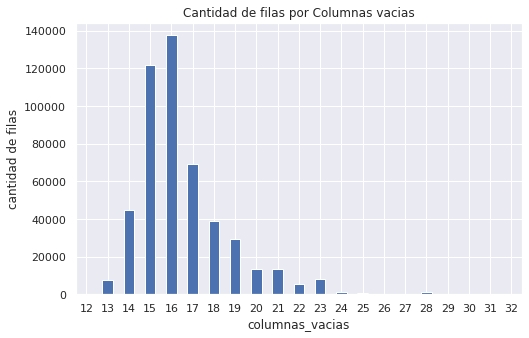

In [51]:
col_vacias.plot.bar(title='Cantidad de filas por Columnas vacias',ylabel='cantidad de filas', rot=0,figsize=(8,5))

Then a comparison between the Null values and not Null values

In [52]:
df_count = pd.concat([df.notna().sum(), df.isna().sum()], axis=1)
df_count.columns = ['Not Null', 'Null']
# columnas sin datos faltantes
df_count[df_count['Null'] == 0]

,Not Null,Null
fecha_hecho,493568,0
cantidad,493568,0
conducta,493568,0
Nbase,493568,0
fecha,493568,0
hora,493568,0


In [53]:
# columnas sin datos
df_count[df_count['Not Null'] == 0]

,Not Null,Null
categoria_penal,0,493568
permiso,0,493568
unidad_medida,0,493568


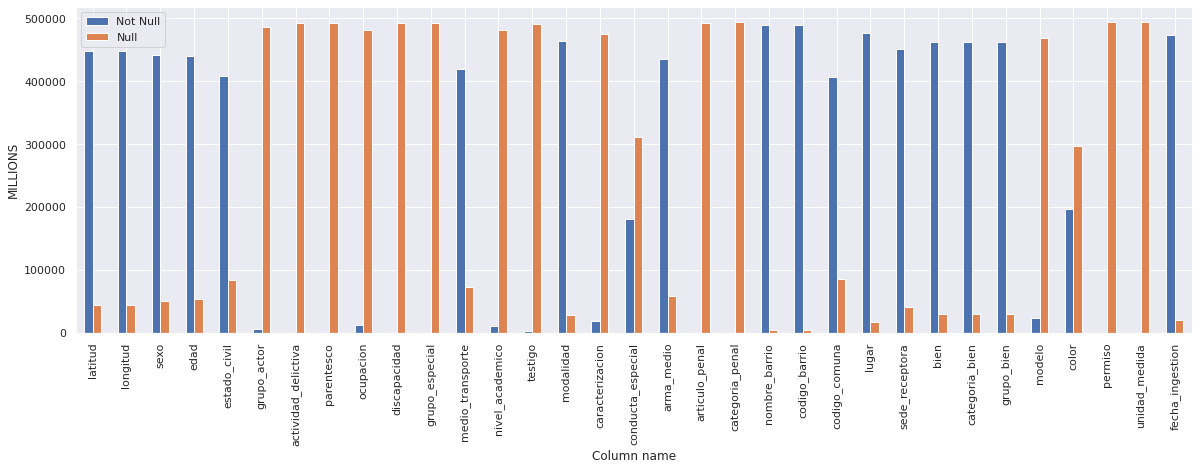

In [54]:
df_count[df_count['Null'] != 0].plot(kind='bar', figsize=(20,6), ylabel='MILLIONS', xlabel='Column name')

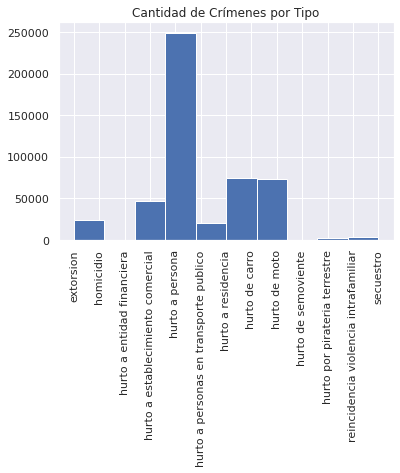

In [58]:
#Histograma de la cantidad de registros por tipo de crimen
#Tener en cuenta que aquí no se sabe cuales de estos registros realmente tienen información completa
plt.hist(x=df["Nbase"])
plt.title('Cantidad de Crímenes por Tipo')
plt.xticks(rotation=90)
plt.show()

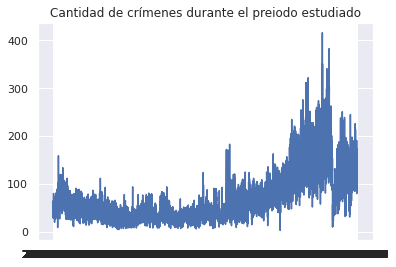

In [59]:
datos= df[["fecha"]]
datos= datos.groupby(["fecha"]).size()
plt.plot(datos.index, datos)
plt.title("Cantidad de crímenes durante el preiodo estudiado")
plt.show()

In [60]:
datos= pd.DataFrame(df["edad"])
dato=datos.groupby(['edad']).size().sort_values()
dato.head()

edad
97.0    2
96.0    5
95.0    5
99.0    6
94.0    6
dtype: int64

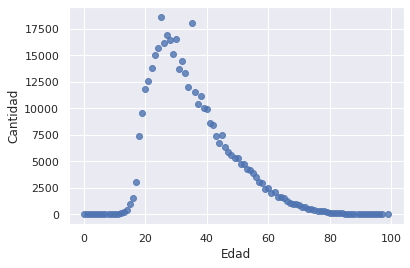

In [61]:
fig, ax = plt.subplots(1, 1, figsize=(6,4))
ax.scatter(x=dato.index, y=dato, alpha= 0.8)
ax.set_xlabel('Edad')
ax.set_ylabel('Cantidad');

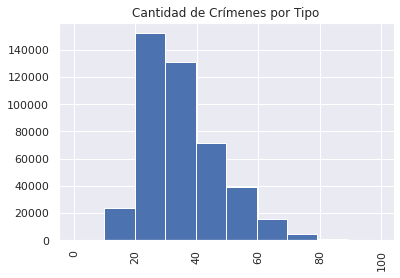

In [62]:

plt.hist(x=df['edad'])
plt.title('Cantidad de Crímenes por Tipo')
plt.xticks(rotation=90)
plt.show()

In [63]:
#Correlación negativa entre la edad y la cantidad de crimenes
r, p = stats.pearsonr(dato.index, dato)
print(f"Correlación Pearson: r={r}, p-value={p}")

Correlación Pearson: r=-0.3912310773196375, p-value=6.225891305394517e-05


In [64]:
df['fecha'] = pd.to_datetime(df['fecha']) 
df["dia_semana"]= df['fecha'].dt.dayofweek
df_dias= df.groupby(["dia_semana"]).size()

Text(0, 0.5, 'Cantidad')

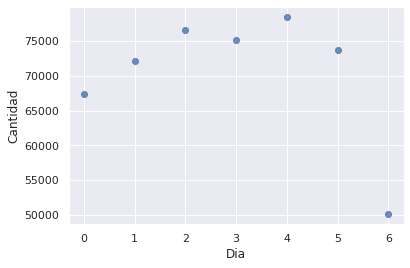

In [65]:
fig, ax = plt.subplots(1, 1, figsize=(6,4))
ax.scatter(x=df_dias.index, y=df_dias, alpha= 0.8)
ax.set_xlabel('Dia')
ax.set_ylabel('Cantidad')
# se debe tener en cuenta que los días de la semana no están en orden, es decir, el día 6 no es el sábado

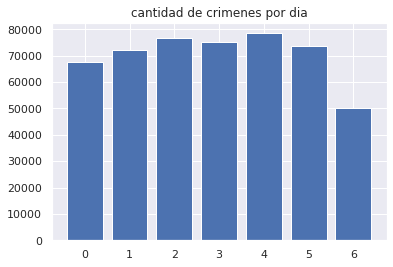

In [66]:
plt.bar(df_dias.index, df_dias)
plt.title('cantidad de crimenes por dia')
plt.show()

In [67]:
datos= pd.DataFrame(df["dia_semana"])
dato=datos.groupby(['dia_semana']).size().sort_values()
dato.head()

dia_semana
6    50078
0    67443
1    72045
5    73768
3    75164
dtype: int64

In [73]:
datos2= df[["latitud","longitud","fecha"]]
datos2= datos2.dropna()
data_mapa= zip(datos2["latitud"], datos2["longitud"])
data_mapa= list(data_mapa)
hm_layer = HeatMap(data_mapa,
                   # These are parameters that we tweak manually to adjust color
                   # See folium docs for more information
                   min_opacity=0.5,
                   radius=3,
                   blur=8, 
                 )
folium_hmap = folium.Map(location=[6.249327,-75.576904], zoom_start=12, tiles="OpenStreetMap")
folium_hmap.add_child(hm_layer)
folium_hmap
#SE PUEDE NOTAR QUE EL SECTOR CON MENOS CANTIDAD DE REGISTROS ES EL POBLADO